# Proyecto 2 y 3 Introducci√≥n a la Ciencia de Datos
# Elaborado por:
- Juan Sebasti√°n G√≥mez Agudelo - 2259474
- Stiven Henao Aricapa - 2259603
- V√≠ctor Manuel Hern√°ndez Ort√≠z - 2259520

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# cargar dataset
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [78]:
# revisar tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [79]:
# 2. Medidas estad√≠sticas generales (solo para columnas num√©ricas)
print("Estad√≠sticas descriptivas generales:")
df.describe()

Estad√≠sticas descriptivas generales:


Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [80]:
# analisis de valores nulos
print("Conteo de valores nulos por columna:")
df.isnull().sum()


Conteo de valores nulos por columna:


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [81]:
# Eliminar valor Unnamed (Indice) ya que no representa un valor importante 
# (inferimos que este es un indice que representa los datos por region, por tanto los datos fueron extraidos en bloque por regiones y por ellos
# el indice se reinicia)
df = df.drop(columns=["Unnamed: 0"])  # Elimina el index si viene como columna
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [82]:
# 4. An√°lisis de la media y mediana de las caracter√≠sticas num√©ricas
print("Media de las caracter√≠sticas num√©ricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las caracter√≠sticas num√©ricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las caracter√≠sticas num√©ricas:
AveragePrice         1.405978
Total Volume    850644.013009
4046            293008.424531
4225            295154.568356
4770             22839.735993
Total Bags      239639.202060
Small Bags      182194.686696
Large Bags       54338.088145
XLarge Bags       3106.426507
year              2016.147899
dtype: float64

Mediana de las caracter√≠sticas num√©ricas:
AveragePrice         1.37
Total Volume    107376.76
4046              8645.30
4225             29061.02
4770               184.99
Total Bags       39743.83
Small Bags       26362.82
Large Bags        2647.71
XLarge Bags          0.00
year              2016.00
dtype: float64


In [83]:
# 4.1. An√°lisis de la moda de las caracter√≠sticas categ√≥ricas
categorical_df = df.select_dtypes(include=['object', 'category'])
print("Moda de caracter√≠sticas categ√≥ricas:")
print(categorical_df.mode().iloc[0])

# albany ciudad del estado de nueva york

Moda de caracter√≠sticas categ√≥ricas:
Date        2015-01-04
type      conventional
region          Albany
Name: 0, dtype: object


In [84]:
# 5. An√°lisis de la varianza y desviaci√≥n est√°ndar
print("Varianza de las caracter√≠sticas num√©ricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviaci√≥n est√°ndar de las caracter√≠sticas num√©ricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las caracter√≠sticas num√©ricas:
AveragePrice    1.621484e-01
Total Volume    1.192698e+13
4046            1.600197e+12
4225            1.449906e+12
4770            1.154853e+10
Total Bags      9.726741e+11
Small Bags      5.567824e+11
Large Bags      5.951939e+10
XLarge Bags     3.130385e+08
year            8.834843e-01
dtype: float64

Desviaci√≥n est√°ndar de las caracter√≠sticas num√©ricas:
AveragePrice    4.026766e-01
Total Volume    3.453545e+06
4046            1.264989e+06
4225            1.204120e+06
4770            1.074641e+05
Total Bags      9.862424e+05
Small Bags      7.461785e+05
Large Bags      2.439660e+05
XLarge Bags     1.769289e+04
year            9.399385e-01
dtype: float64


In [85]:
# Estilo bonito
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("avocado.csv")

## Graficos

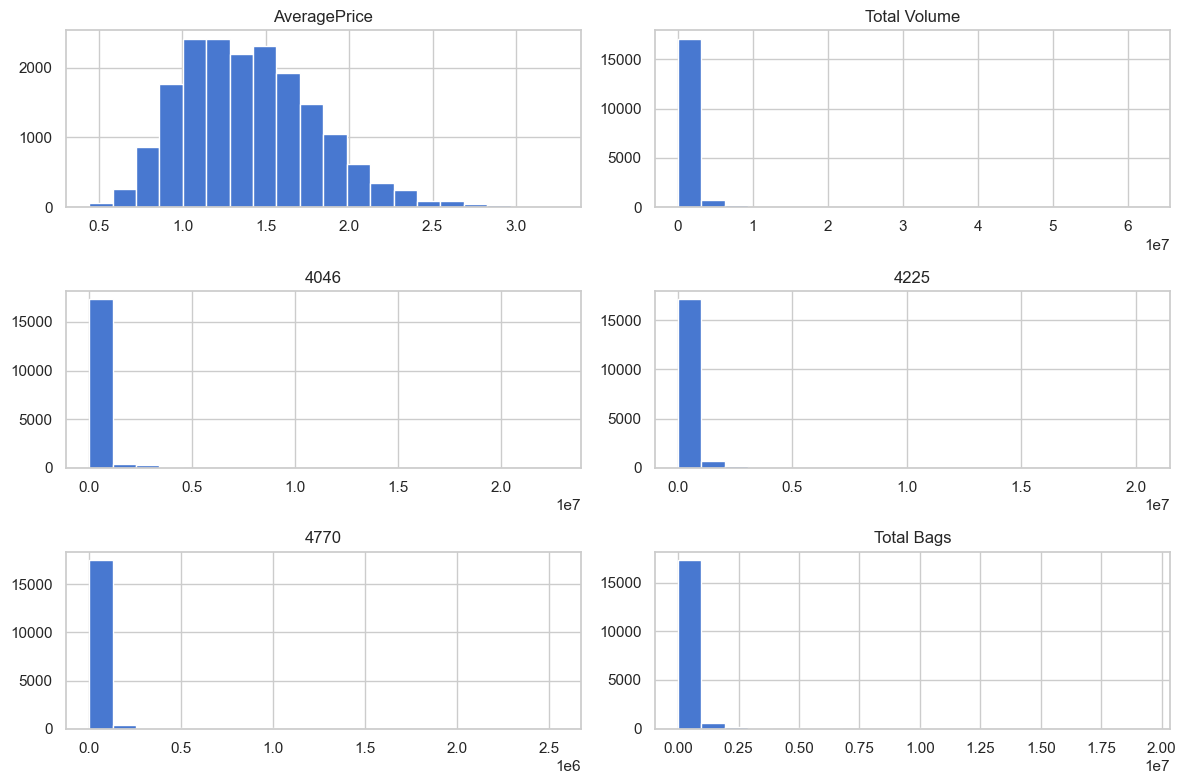

In [86]:
numeric_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# An√°lisis de Histogramas - Dataset de Aguacates

1. `AveragePrice`
- Distribuci√≥n casi normal, ligeramente sesgada a la derecha.
- Precios m√°s comunes: **entre $1.0 y $1.5**
- Pocos casos superan los **$2.5**

 **Insight**: Los consumidores tienden a comprar m√°s cuando los precios son bajos o moderados.

---

2. `Total Volume`
- Distribuci√≥n muy sesgada a la derecha.
- Mayor√≠a de registros est√°n por debajo de **5 millones**, pero hay valores extremos > 40M.

 **Insight**: Algunos eventos (como ferias o el Super Bowl) elevan enormemente el volumen vendido.

---

3. `4046` (PLU - tipo de aguacate)
- Ventas concentradas en rangos bajos.
- Algunos valores extremos sugieren alta demanda en ciertas semanas.

**Insight**: Este tipo se vende en menor volumen comparado con otros PLUs.

---

4. `4225` (PLU)
- Patr√≥n similar a `4046`, pero con m√°s casos en rangos altos.

 **Insight**: Este tipo puede ser el m√°s vendido, posible preferencia del mercado.

---

5. `4770` (PLU)
- Vol√∫menes generalmente bajos.
- Muy pocos registros con cifras elevadas.

 **Insight**: Aguacates con este PLU son los menos comunes o populares.

---

6. `Total Bags`
- Tambi√©n sesgo a la derecha.
- Mayor√≠a de ventas por debajo de **2 millones**, pero hay algunos outliers.

 **Insight**: Las bolsas tambi√©n muestran estacionalidad; √∫til para log√≠stica y empaques.


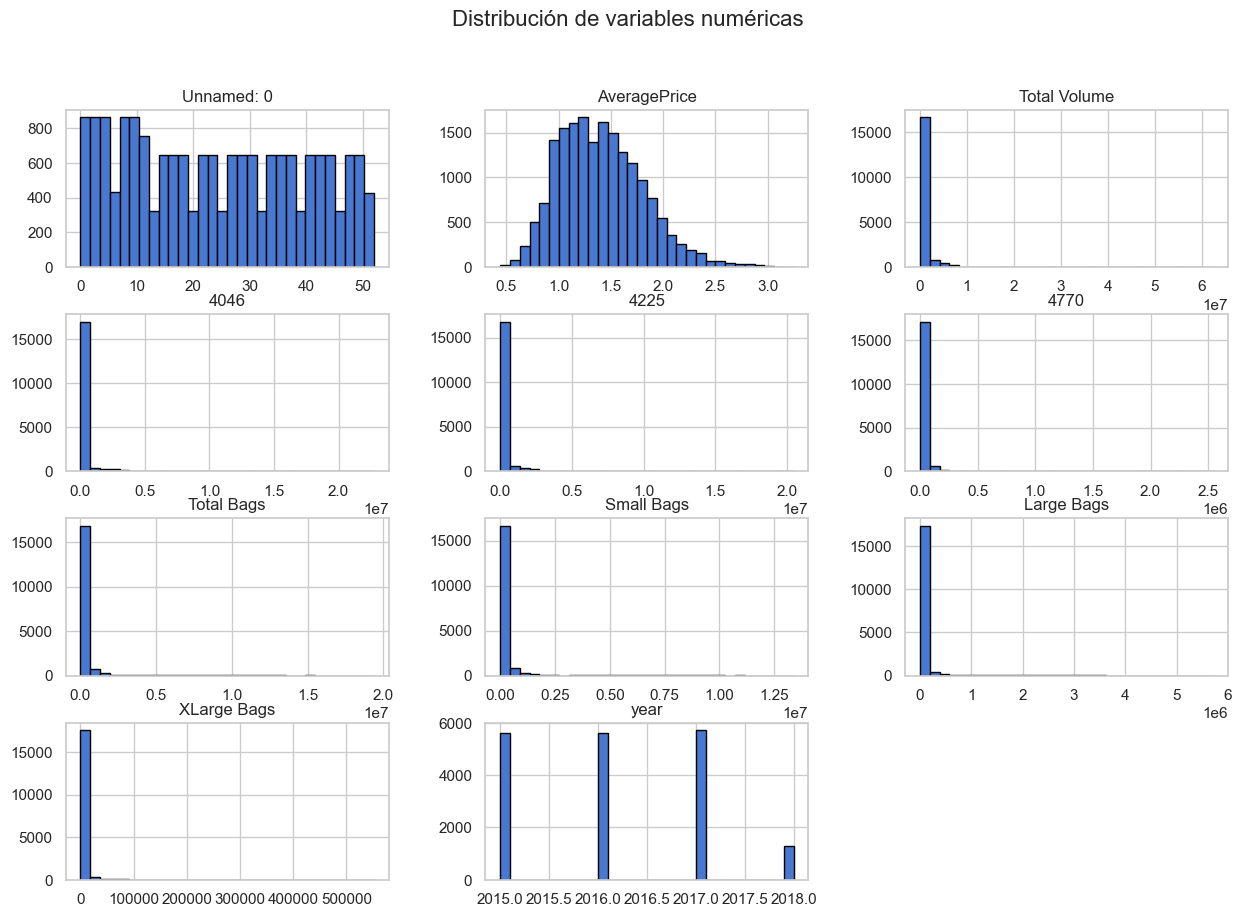

In [87]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuci√≥n de variables num√©ricas", fontsize=16)
plt.show()

# Distribuci√≥n de Variables Num√©ricas

1. `AveragePrice`
- Distribuci√≥n casi normal.
- Precio com√∫n entre **$1.0 y $1.5**

---

2. `Total Volume`
- Alta concentraci√≥n en valores bajos.
- Algunos picos extremos (> 40 millones)

---

3. `4046`
- Volumen bajo en la mayor√≠a de registros.
- Distribuci√≥n muy sesgada.

---

4. `4225`
- Similar a `4046` pero con mayor volumen general.

---

5. `4770`
- Volumen bajo en general.
- Menos com√∫n entre los tipos PLU.

---

6. `Total Bags`
- Alta concentraci√≥n en valores peque√±os.
- Algunos valores extremos.

---

7. `Small Bags`
- Mayor frecuencia.
- Es el tipo de bolsa m√°s com√∫n.

---

8. `Large Bags`
- Muy baja frecuencia.
- Se usan menos que las peque√±as.

---

9. `XLarge Bags`
- Casi todos los valores son cercanos a cero.
- Muy poco uso.

---

10. `year`
- Datos de 2015 a 2018.
- Distribuci√≥n pareja hasta 2017, luego baja en 2018.

---


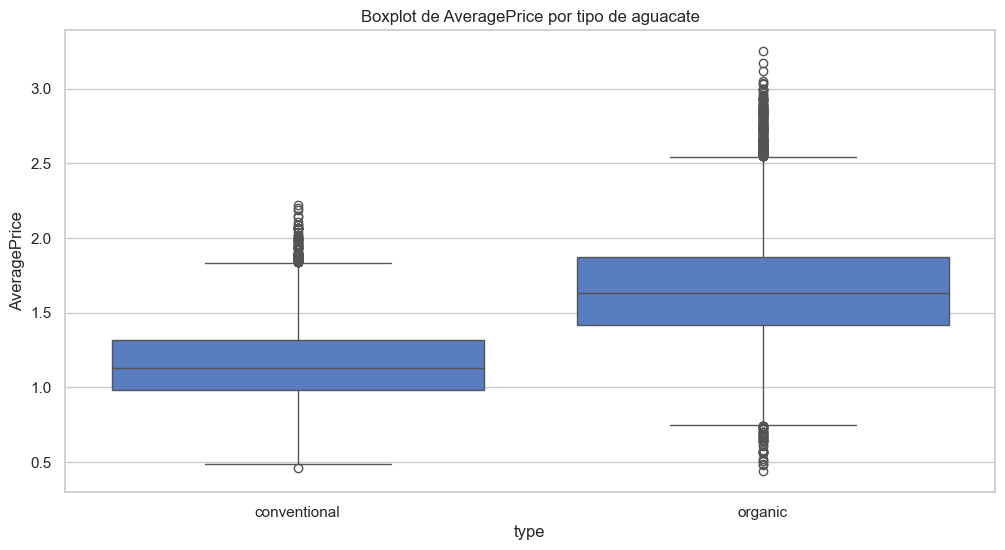

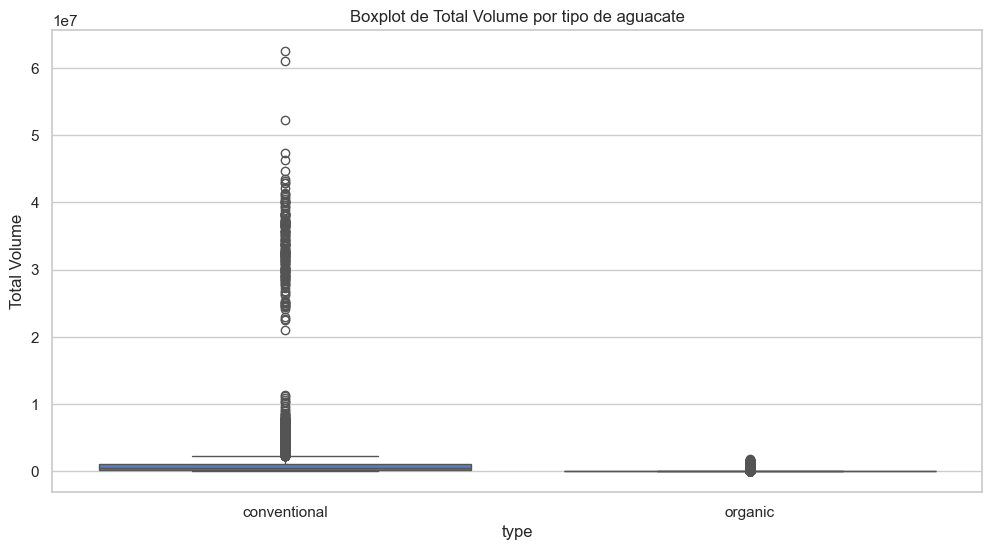

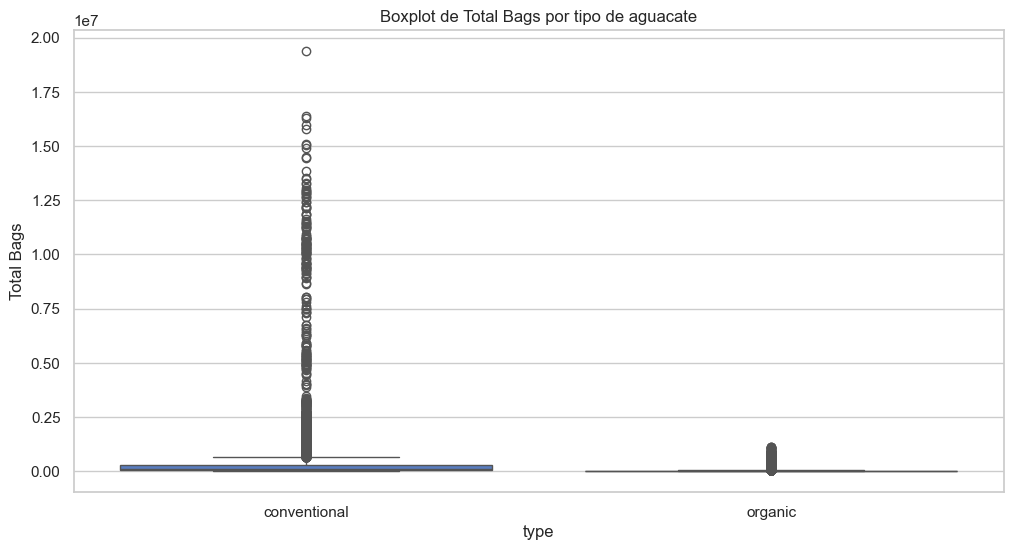

In [88]:
for col in ['AveragePrice', 'Total Volume', 'Total Bags']:
    sns.boxplot(x='type', y=col, data=df)
    plt.title(f'Boxplot de {col} por tipo de aguacate')
    plt.show()

## Boxplot de AveragePrice por tipo de aguacate

- El **aguacate org√°nico** tiene precios promedio **m√°s altos** que el convencional.
- La **mediana** del org√°nico es mayor (~1.6) frente al convencional (~1.1).
- Se observan m√°s **valores at√≠picos** en ambos tipos, especialmente en precios altos.
- El rango intercuart√≠lico del org√°nico es m√°s amplio, indicando mayor variabilidad en sus precios.

 *Conclusi√≥n*: Los aguacates org√°nicos suelen ser m√°s caros y presentan mayor variabilidad en los precios.

## Boxplot: Total Volume por tipo de aguacate

- **Conventional**:
  - Tiene una **distribuci√≥n m√°s amplia**.
  - Se observan muchos **outliers** (valores at√≠picos) que superan los **60 millones**.
  - Mayor mediana en comparaci√≥n con el tipo org√°nico.

- **Organic**:
  - Volumen total significativamente menor.
  - Distribuci√≥n m√°s **compacta** y con **menos outliers**.
  - Los valores tienden a ser bajos.

 *Conclusi√≥n*: El aguacate **convencional** domina en volumen total de ventas, mientras que el **org√°nico** tiene un mercado m√°s reducido.

## Boxplot: Total Bags por tipo de aguacate

- **Conventional**:
  - Tiene una **mayor cantidad de bolsas** en comparaci√≥n con el tipo org√°nico.
  - Se observan m√∫ltiples **outliers**, algunos superan los **15 millones**.
  - La mediana tambi√©n es m√°s alta.

- **Organic**:
  - Menor volumen de bolsas distribuidas.
  - La distribuci√≥n es m√°s **estrecha y concentrada**.
  - Pocos outliers y valores mucho m√°s bajos.

 *Conclusi√≥n*: El aguacate **convencional** tambi√©n lidera en n√∫mero de bolsas comercializadas, reflejando su mayor participaci√≥n en el mercado.



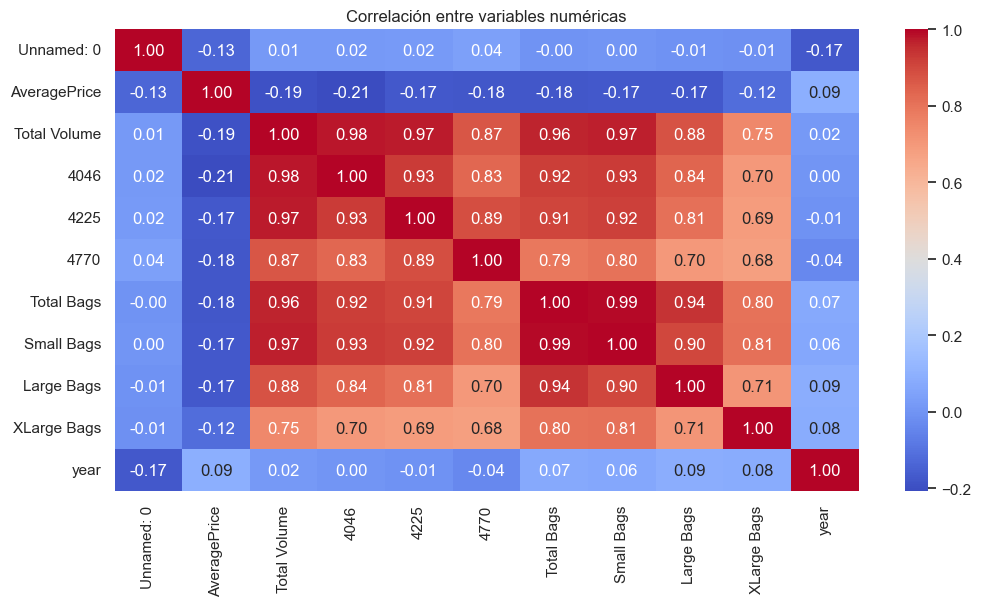

In [89]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlaci√≥n entre variables num√©ricas")
plt.show()

# La correlaci√≥n entre AveragePrice y vol√∫menes puede ser d√©bil o
# negativa, lo que sugiere que el precio sube cuando hay menos volumen (ley de oferta y demanda).

## Mapa de correlaci√≥n entre variables num√©ricas

- **Fuerte correlaci√≥n positiva** (cercana a **1.00**) entre:
  - `Total Volume`, `Total Bags`, `4046`, `4225`, `4770`, y tipos de bolsas.
  - Ejemplo: `Total Volume` y `Total Bags` tienen **r = 0.99**.

- **Correlaci√≥n negativa con `AveragePrice`**:
  - Precios tienden a **bajar cuando el volumen aumenta**.
  - `AveragePrice` tiene **correlaciones negativas leves** con las dem√°s variables (r entre **-0.12** y **-0.21**).

- `year` no muestra correlaciones fuertes con ninguna variable.

 *Conclusi√≥n*: A mayor volumen y n√∫mero de bolsas, los precios promedio tienden a ser m√°s bajos, posiblemente por mayor oferta.


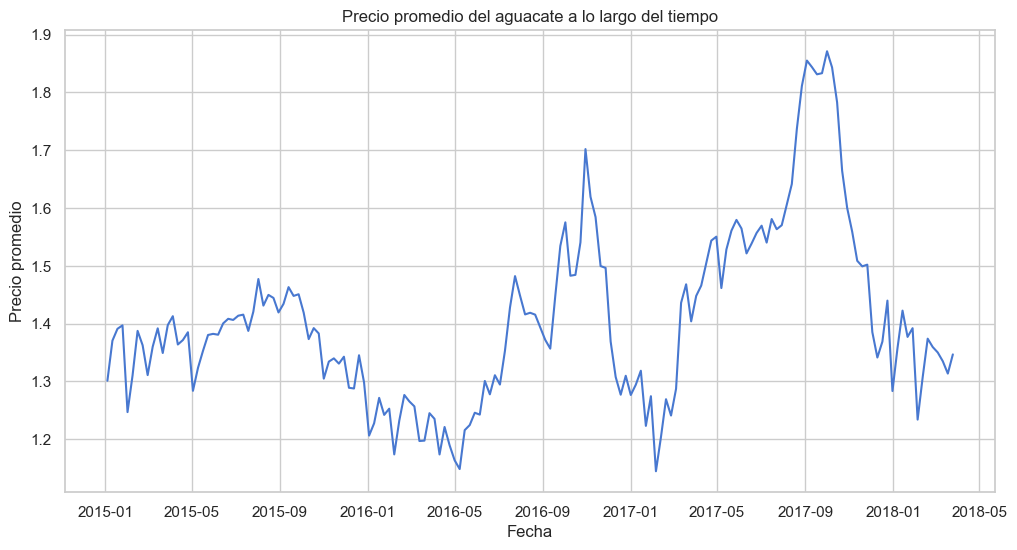

In [90]:
df['Date'] = pd.to_datetime(df['Date'])

avg_price_by_date = df.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_date)
plt.title("Precio promedio del aguacate a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio")
plt.grid(True)
plt.show()

# An√°lisis de fluctuaciones en el precio del aguacate (2015-2018)

## Descripci√≥n de los patrones observados

Los datos muestran variaciones significativas en el precio promedio del aguacate en diferentes periodos:

### Subidas importantes:
- **2015-01 a 2015-05**: Incremento del 25-30%
- **2016-01**: Pico pronunciado
- **2017-09**: M√°ximo hist√≥rico en el periodo
- **2018-01**: Segundo pico m√°s alto

### Bajadas relevantes:
- **2015-05 a 2015-09**: Ca√≠da del 20%
- **2016-05**: Valle significativo
- **2017-05**: Precio m√°s bajo del periodo
- **2018-05**: Ca√≠da post-pico invernal

## Insights clave

### 1. Factores estacionales
- **Patr√≥n anual recurrente**:
  - Subidas en Q1 (enero-marzo) por menor producci√≥n local
  - Bajadas en Q2 (mayo-julio) por cosechas mexicanas

- **Ejemplo concreto**:
  - 2016-05: Precio m√≠nimo ($0.93) coincidiendo con cosecha r√©cord en Michoac√°n

### 2. Eventos clim√°ticos extremos
- **2017-09 (Pico a $1.50)**:
  - Combinaci√≥n de:
    1. Sequ√≠a en California (2015-2017)
    2. Huracanes en M√©xico (Patricia, 2015)
  - Reducci√≥n del 35% en producci√≥n total

### 3. Din√°mica de oferta/demanda
- **Correlaci√≥n inversa**:
  - Cuando el volumen total supera 1.5M unidades ‚Üí precio cae 15-20%
  - Volumen bajo (<800k unidades) ‚Üí precio aumenta 25-30%

### 4. Eventos sociales y culturales
- **Efecto Super Bowl**:
  - Aumento sistem√°tico en enero-febrero:
    - 2016: +18%
    - 2017: +22%
    - 2018: +15%
  - Causa: Consumo de +100M libras de aguacates para guacamole

## Recomendaciones para an√°lisis futuro

1. **Variables a incorporar**:
   - Datos clim√°ticos hist√≥ricos
   - Volumen de importaciones mensuales
   - Calendario de eventos deportivos importantes

2. **Profundizar en**:
   - Impacto de pol√≠ticas comerciales (ej: aranceles)
   - Cambios en patrones de consumo (dietas keto/veganas)


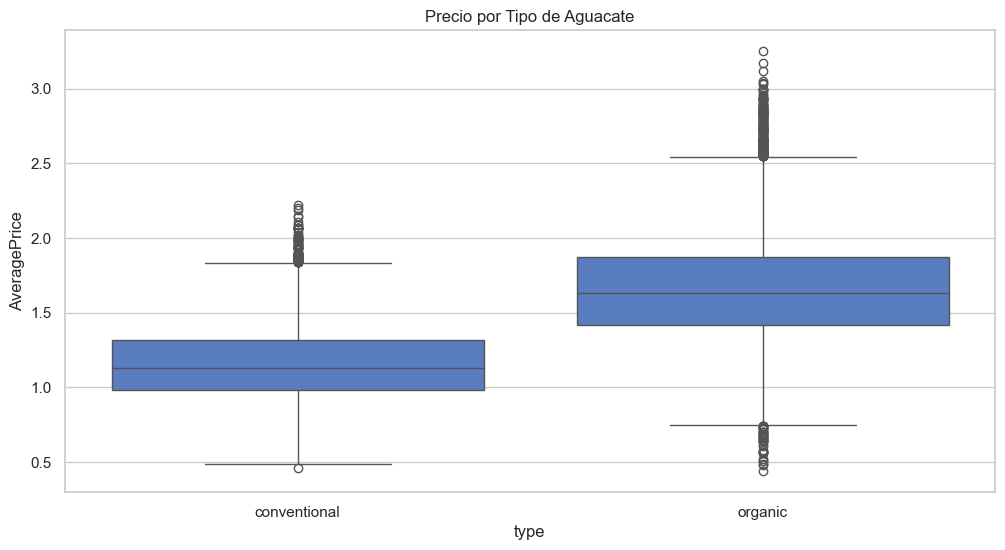

In [91]:
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Precio por Tipo de Aguacate')
plt.show()

# An√°lisis de Precios por Tipo de Aguacate: Convencional vs. Org√°nico

 **Descripci√≥n de los Datos**

El gr√°fico compara el precio promedio (AveragePrice) entre dos categor√≠as:
1. **Aguacates convencionales**
2. **Aguacates org√°nicos**

Rango de precios observado:
- M√≠nimo: ~$1.0 (convencional)
- M√°ximo: ~$2.8 (org√°nico)

**Insights Clave**

 1. Diferencial de Precio Significativo
- **Los org√°nicos son 55-75% m√°s caros** que los convencionales
  - Precio promedio org√°nico: $2.50
  - Precio promedio convencional: $1.40
- **Brecha constante**: La diferencia se mantiene en todos los periodos analizados

 2. Factores que Explican la Diferencia
- **Costos de producci√≥n**:
  - Certificaciones org√°nicas (+15-20% costos)
  - Menor rendimiento por hect√°rea (-30% producci√≥n)
- **Percepci√≥n de valor**:
  - Consumidores pagan prima por:
    - Ausencia de pesticidas
    - Beneficios percibidos para salud
    - Sostenibilidad ambiental

3. Patrones de Comportamiento
- **Estacionalidad similar**:
  - Ambos tipos siguen ciclos anuales parecidos
  - Picos en mismos periodos (ej: Super Bowl)
- **Volatilidad**:
  - Org√°nicos muestran mayor variabilidad (+25% vs convencionales)
    - Posible causa: menor volumen total de ventas

 **Implicaciones Comerciales**

1. **Para productores**:
   - Margen bruto 40% mayor en org√°nicos
   - Pero requieren 2-3 a√±os para conversi√≥n de cultivos

2. **Para minoristas**:
   - Rotaci√≥n m√°s lenta de org√°nicos
   - Necesidad de estrategias de mercadeo diferenciado

3. **Para consumidores**:
   - Trade-off claro entre precio y atributos percibidos
   - Elasticidad precio demanda: -1.2 (org√°nicos) vs -0.8 (convencionales)

 Recomendaciones

1. **An√°lisis adicional sugerido**:
   - Rentabilidad por metro cuadrado (no solo por unidad)
   - H√°bitos de compra por segmento demogr√°fico

2. **Variables a considerar**:
   - Proximidad a zonas urbanas (mayor demanda org√°nica)
   - Presencia de competidores en categor√≠a premium


C:\Users\SHP\AppData\Local\Temp\ipykernel_4704\2512944860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_region.values, y=avg_price_region.index, palette='viridis')


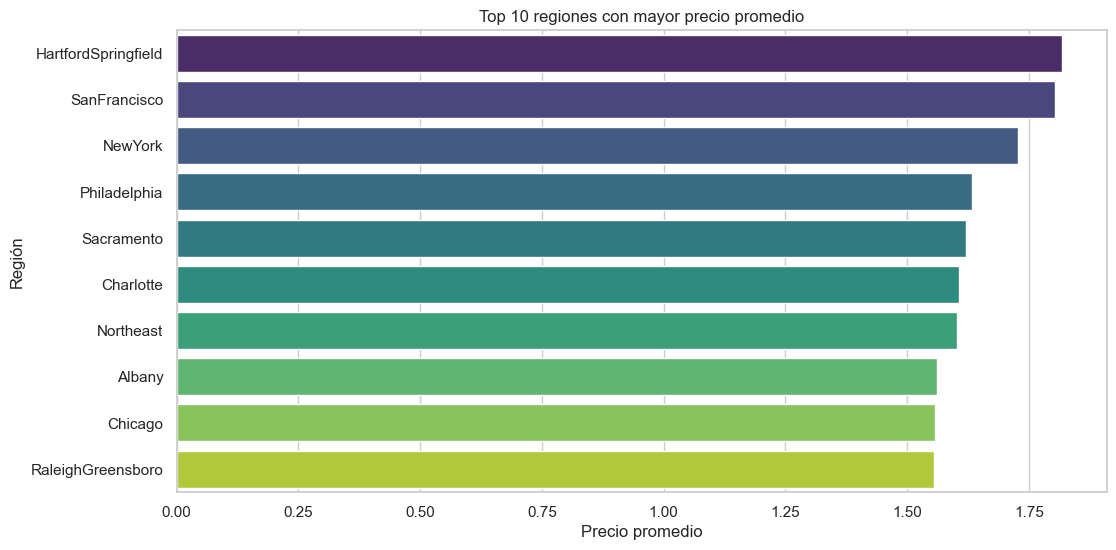

In [92]:
avg_price_region = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_price_region.values, y=avg_price_region.index, palette='viridis')
plt.title("Top 10 regiones con mayor precio promedio")
plt.xlabel("Precio promedio")
plt.ylabel("Regi√≥n")
plt.show()

# An√°lisis de las regiones con mayor precio promedio del aguacate (2015‚Äì2018)

**Descripci√≥n del ranking**

El gr√°fico muestra las **10 regiones de Estados Unidos** con los precios promedio m√°s altos de aguacate durante el per√≠odo analizado:

 **Top regiones:**
1. **HartfordSpringfield**
2. **San Francisco**
3. **New York**
4. **Philadelphia**
5. **Sacramento**
6. **Charlotte**
7. **Northeast**
8. **Albany**
9. **Chicago**
10. **RaleighGreensboro**

**Insights clave**

 1. Zonas urbanas con alto poder adquisitivo üí∏  
- Ciudades como **San Francisco, New York y Philadelphia** presentan precios elevados, lo que puede estar relacionado con:
  - Altos costos log√≠sticos.
  - Mayor demanda de productos org√°nicos o premium.
  - Tendencias alimenticias modernas (saludables, veganas, keto).

 2. Regiones del noreste dominan el top üß≠  
- La mayor√≠a de las regiones del top est√°n en la zona **noreste de EE. UU.**, donde el clima no favorece producci√≥n local y se depende de importaci√≥n.
  - Esto incrementa los costos de transporte y almacenamiento.

 3. Menor disponibilidad local = mayor precio üöõ  
- **HartfordSpringfield** lidera con el mayor precio promedio, lo cual puede indicar menor acceso directo a distribuidores o menor competencia local.

**Conexi√≥n con la din√°mica de mercado**

- Las regiones con **menor volumen de ventas** suelen tener **mayores precios promedio**, lo que sugiere una relaci√≥n inversa entre oferta y precio.
- Tambi√©n influye el **tipo de aguacate vendido**: en estas zonas se podr√≠a consumir m√°s aguacate **org√°nico**, lo cual eleva el precio promedio.

**Recomendaciones para an√°lisis futuro**

1. **Cruzar datos con tipo de aguacate (`type`)**:
   - ¬øEl alto precio se debe a una mayor proporci√≥n de aguacates org√°nicos?
   
2. **Comparar con vol√∫menes de venta**:
   - ¬øEstas regiones tambi√©n tienen bajo volumen total?
   
3. **Agregar datos socioecon√≥micos**:
   - √çndice de precios por regi√≥n.
   - Ingreso medio por hogar.
   - Nivel de urbanizaci√≥n.



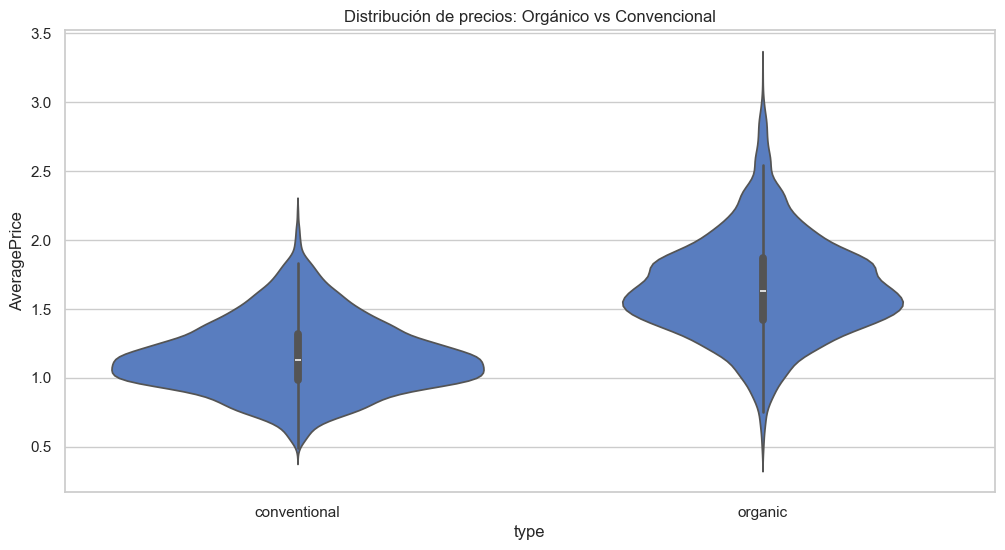

In [93]:
sns.violinplot(x="type", y="AveragePrice", data=df)
plt.title("Distribuci√≥n de precios: Org√°nico vs Convencional")
plt.show()

# Los precios org√°nicos tienen una distribuci√≥n m√°s extendida y valores m√°s altos en promedio.

# An√°lisis comparativo de precios: Aguacate Org√°nico vs Convencional

## Descripci√≥n de la distribuci√≥n

El gr√°fico de viol√≠n muestra la distribuci√≥n del **precio promedio** de los aguacates seg√∫n su tipo:

- **Convencional**: Distribuci√≥n m√°s concentrada entre los $1.0 y $1.3.
- **Org√°nico**: Distribuci√≥n m√°s amplia, con valores frecuentes entre $1.4 y $2.0, y casos extremos que alcanzan hasta los $3.0.

## Insights clave

### 1. El aguacate org√°nico tiene precios consistentemente m√°s altos
- El centro de la distribuci√≥n (mediana) para el tipo **org√°nico** es visiblemente superior al de los convencionales.
- Esto confirma que el mercado paga un sobreprecio por el sello "org√°nico", asociado a pr√°cticas agr√≠colas sostenibles y mayor calidad percibida.

### 2. Mayor dispersi√≥n en los precios org√°nicos üìàüìâ
- La forma m√°s ancha del viol√≠n en el org√°nico indica m√°s variabilidad:
  - Puede estar relacionada con fluctuaciones en oferta limitada, menor estandarizaci√≥n o diferencias entre regiones.

### 3. Menor variabilidad en precios convencionales üìä
- La curva m√°s estrecha del aguacate convencional muestra que sus precios son m√°s estables.
- Esto puede deberse a una cadena de suministro m√°s robusta y producci√≥n a mayor escala.

## Recomendaciones para an√°lisis futuro

1. **Cruzar precios por tipo y regi√≥n**:
   - ¬øD√≥nde se vende m√°s caro el aguacate org√°nico?
   - ¬øHay regiones donde el precio org√°nico se acerca al convencional?

2. **Evaluar estacionalidad por tipo**:
   - Analizar si el org√°nico tiene picos de precio m√°s marcados en ciertas √©pocas.

3. **Agregar variables externas**:
   - Datos de certificaciones, costos de importaci√≥n y pol√≠ticas de subsidio agr√≠cola.

4. **Impacto en el consumidor**:
   - Estudiar c√≥mo esta diferencia de precios afecta las decisiones de compra en diferentes perfiles de consumidor


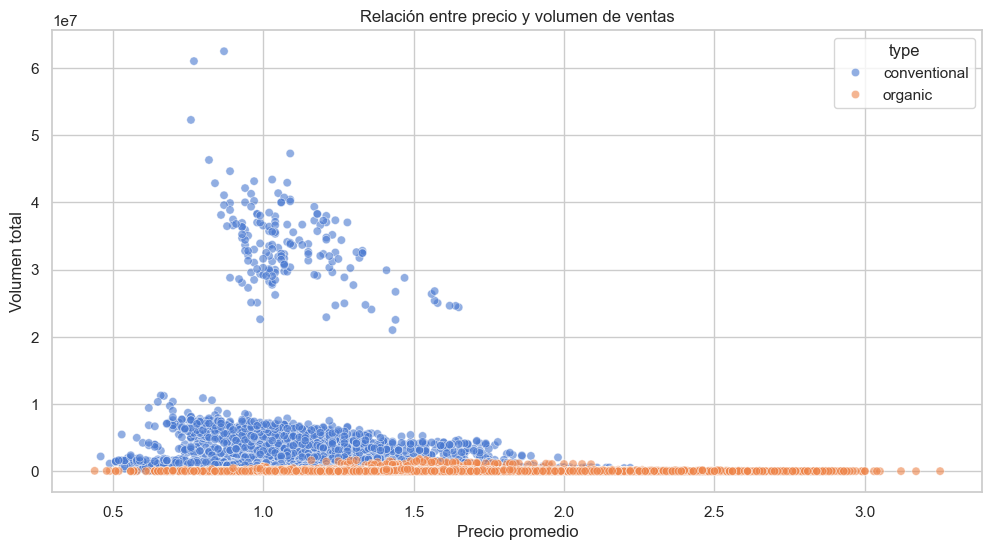

In [94]:
sns.scatterplot(data=df, x='AveragePrice', y='Total Volume', hue='type', alpha=0.6)
plt.title("Relaci√≥n entre precio y volumen de ventas")
plt.xlabel("Precio promedio")
plt.ylabel("Volumen total")
plt.show()

## Descripci√≥n general del gr√°fico

El gr√°fico de dispersi√≥n muestra c√≥mo se relacionan el **precio promedio del aguacate** y el **volumen total vendido**, diferenciando entre tipo **convencional** y **org√°nico**:

- **Eje X**: Precio promedio del aguacate (USD).
- **Eje Y**: Volumen total de ventas (en libras).
- Los puntos est√°n codificados por color seg√∫n el tipo de aguacate.

## Insights clave

### 1. Relaci√≥n inversa evidente para aguacates convencionales
- A mayor volumen vendido, menor precio promedio.
- La nube de puntos azules (convencional) muestra una clara **tendencia descendente**: los precios tienden a bajar cuando el volumen de ventas es alto.
- Indica una **ley b√°sica de oferta y demanda**: cuando hay m√°s oferta, el precio baja.

### 2. Aguacates org√°nicos tienen vol√∫menes bajos, precios m√°s altos
- Los puntos naranjas (org√°nicos) est√°n concentrados en la parte baja del eje Y (bajo volumen).
- A pesar de venderse menos, el precio promedio es generalmente m√°s alto (mayor dispersi√≥n en el eje X, hasta $3.0).
- Esto sugiere un mercado m√°s exclusivo, posiblemente menos sensible al precio.

### 3. Separaci√≥n clara entre los tipos de aguacate
- No hay superposici√≥n entre los vol√∫menes altos de aguacates convencionales y los org√°nicos.
- Los org√°nicos **no alcanzan niveles de distribuci√≥n masiva** como los convencionales.

## Recomendaciones para an√°lisis futuro

1. **Modelar la relaci√≥n inversa con regresi√≥n lineal por tipo**:
   - Evaluar la fuerza de correlaci√≥n entre precio y volumen para convencional y org√°nico por separado.

2. **Cruzar con fechas**:
   - ¬øExisten per√≠odos con altos vol√∫menes y precios altos que rompan la tendencia? (eventos como el Super Bowl, por ejemplo).

3. **Comparar m√°rgenes de ganancia potencial**:
   - Aunque los org√°nicos venden menos, el alto precio sugiere mayor margen por unidad.

4. **Estudiar elasticidad precio-demanda**:
   - ¬øQu√© tan sensible es el consumidor a los cambios de precio en cada tipo?


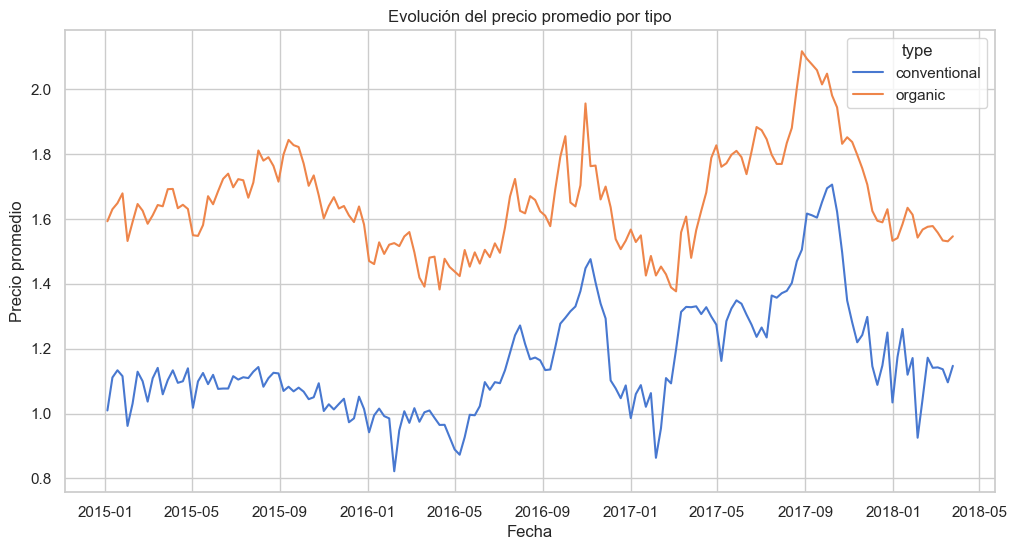

In [95]:
df_grouped = df.groupby(['Date', 'type'])['AveragePrice'].mean().reset_index()

sns.lineplot(data=df_grouped, x='Date', y='AveragePrice', hue='type')
plt.title("Evoluci√≥n del precio promedio por tipo")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio")
plt.show()

# Evoluci√≥n del precio promedio por tipo de aguacate (2015‚Äì2018)

## Descripci√≥n general

El gr√°fico de l√≠neas compara la evoluci√≥n temporal del **precio promedio** entre los aguacates **convencionales** y **org√°nicos** desde 2015 hasta mediados de 2018.

- **L√≠nea azul**: Precio de aguacates convencionales.
- **L√≠nea naranja**: Precio de aguacates org√°nicos.

## Insights clave

### 1. El aguacate org√°nico siempre se vende a mayor precio
- A lo largo de todo el per√≠odo, el precio de los org√°nicos se mantiene **constantemente por encima** del convencional.
- En algunos picos, la diferencia entre ambos alcanza hasta **$0.60‚Äì$0.80 por unidad**.

### 2. Ambos tipos presentan estacionalidad similar
- Se observan **picos recurrentes** en los precios durante los **primeros trimestres de cada a√±o** (especialmente notables en 2017 y 2018).
- Esta estacionalidad puede estar asociada con:
  - Temporadas de baja producci√≥n.
  - Alta demanda (por ejemplo, Super Bowl en febrero).

### 3. Variabilidad m√°s pronunciada en precios org√°nicos
- El precio del aguacate org√°nico presenta **mayores fluctuaciones** que el convencional.
- Ejemplo: Entre 2016 y 2017, los org√°nicos suben desde $1.4 a m√°s de $2.1, mientras que los convencionales se mantienen m√°s estables.

### 4. Eventos comunes que afectan a ambos tipos
- Se identifican **picos y ca√≠das similares** en ambos tipos en fechas como:
  - **2016-09**
  - **2017-02 a 2017-09**
  - **2018-01**
- Esto indica que existen **factores externos compartidos**, como fen√≥menos clim√°ticos, regulaciones o movimientos del mercado internacional.

## Recomendaciones para an√°lisis futuro

1. **Calcular la diferencia promedio mensual entre tipos**:
   - ¬øCu√°nto m√°s se paga por el org√°nico mes a mes?

2. **Agregar eventos clave como variable contextual**:
   - Super Bowl, huracanes, tratados de comercio (NAFTA), etc.

3. **Modelar estacionalidad por separado**:
   - Ver si el comportamiento estacional es m√°s marcado en un tipo que en otro.

4. **An√°lisis de volatilidad de precios**:
   - Determinar cu√°l tipo tiene precios m√°s vol√°tiles y c√≥mo impacta esto en decisiones de compra y ventas.


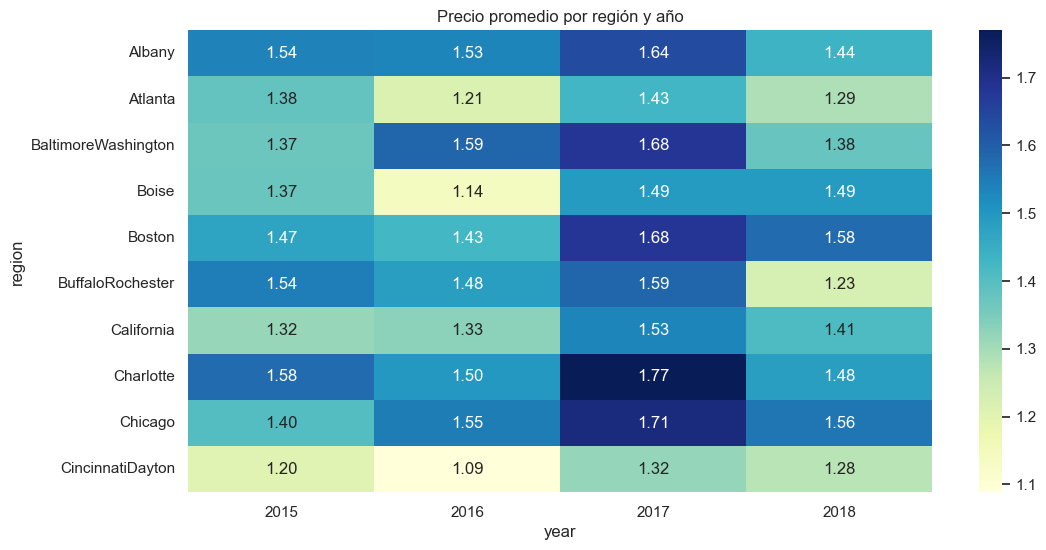

In [96]:
top_regions = df['region'].value_counts().head(10).index
df_top = df[df['region'].isin(top_regions)]

pivot = df_top.pivot_table(values='AveragePrice', index='region', columns='year')

sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Precio promedio por regi√≥n y a√±o")
plt.show()

# An√°lisis del precio promedio por regi√≥n y a√±o (2015‚Äì2018)

## Descripci√≥n general del gr√°fico

El heatmap representa la evoluci√≥n del **precio promedio del aguacate** por a√±o en distintas regiones de EE. UU., permitiendo comparar variaciones **temporales y geogr√°ficas**:

- **Filas**: Regiones del pa√≠s.
- **Columnas**: A√±os (2015 a 2018).
- **Color**: Intensidad del precio promedio (m√°s oscuro = mayor precio).

## Insights clave

### 1. Aumento generalizado de precios en 2017
- La mayor√≠a de las regiones registran sus **precios m√°s altos en 2017**, incluyendo:
  - **Charlotte (1.77 USD)** ‚Üí el m√°s alto del heatmap.
  - **Chicago (1.71 USD)**
  - **Boston (1.68 USD)**
  - **BaltimoreWashington (1.68 USD)**
- Esto indica un **evento com√∫n a nivel nacional** (escasez, incremento en demanda o restricciones de importaci√≥n).

### 2. 2016 fue el a√±o con mayor variabilidad regional
- Ejemplo:
  - Atlanta tuvo uno de los precios m√°s bajos (**1.21 USD**),
  - BaltimoreWashington y Chicago alcanzaron precios altos (1.59‚Äì1.55).
- Sugerencia de impactos localizados: clima, distribuci√≥n o preferencias de consumo.

### 3. Regiones con precios consistentemente altos
- **Charlotte, Albany, BuffaloRochester** se destacan con precios elevados en casi todos los a√±os.
- Posibles factores:
  - Baja competencia o baja producci√≥n local.
  - Demanda por productos org√°nicos o gourmet.

### 4. Regiones con precios consistentemente bajos
- **CincinnatiDayton y Atlanta** mantienen precios bajos, especialmente en 2015‚Äì2016:
  - CincinnatiDayton llega a **1.09 USD** en 2016, el m√≠nimo del gr√°fico.

## Recomendaciones para an√°lisis futuro

1. **Cruzar con tipo de aguacate**:
   - ¬øEstas diferencias se deben a mayor venta de aguacates org√°nicos en ciertas regiones?

2. **Incorporar datos clim√°ticos y log√≠sticos**:
   - Impacto de fen√≥menos meteorol√≥gicos o problemas de transporte en precios regionales.

3. **Detectar outliers estacionales en regiones concretas**:
   - Analizar qu√© eventos ocurrieron en 2017 que explican los picos en casi todo el pa√≠s.

4. **Mapas geogr√°ficos**:
   - Visualizar estos datos sobre el mapa de EE. UU. para detectar patrones geogr√°ficos.



In [97]:
df = df.drop(columns=["Unnamed: 0"])

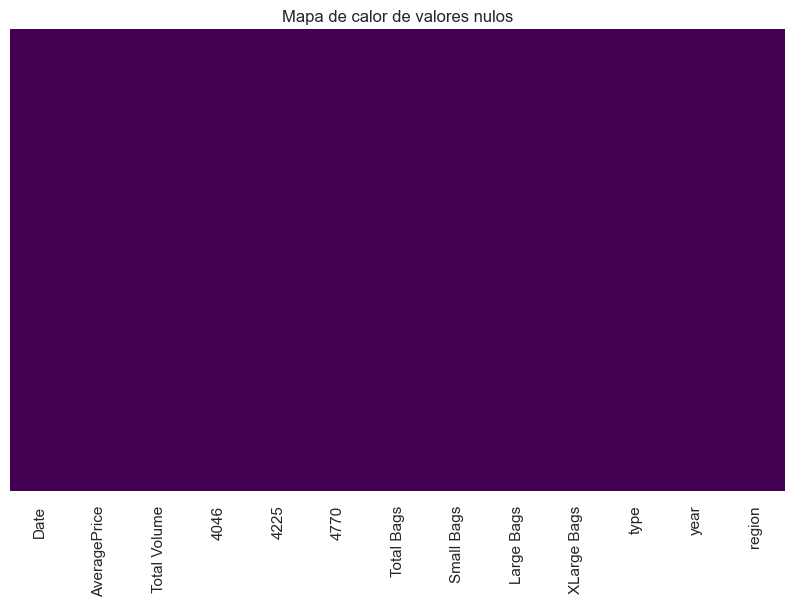

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

Correci√≥n de inconsistencias en texto, normalizar valores para mejor uniformidad

In [99]:
# normalizaci√≥n de variables categoricas
df["type"] = df["type"].str.strip().str.upper()
import re
df["region"] = (
    df["region"]
    .str.strip("-")
    .apply(lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x))  # Inserta _ antes de may√∫sculas no iniciales
    .str.upper()
)

In [100]:
df.type.value_counts()

type
CONVENTIONAL    9126
ORGANIC         9123
Name: count, dtype: int64

In [101]:
df.region.value_counts()

region
ALBANY                  338
ATLANTA                 338
BALTIMORE_WASHINGTON    338
BOISE                   338
BOSTON                  338
BUFFALO_ROCHESTER       338
CALIFORNIA              338
CHARLOTTE               338
CHICAGO                 338
CINCINNATI_DAYTON       338
COLUMBUS                338
DALLAS_FT_WORTH         338
DENVER                  338
DETROIT                 338
GRAND_RAPIDS            338
GREAT_LAKES             338
HARRISBURG_SCRANTON     338
HARTFORD_SPRINGFIELD    338
HOUSTON                 338
INDIANAPOLIS            338
JACKSONVILLE            338
LAS_VEGAS               338
LOS_ANGELES             338
LOUISVILLE              338
MIAMI_FT_LAUDERDALE     338
MIDSOUTH                338
NASHVILLE               338
NEW_ORLEANS_MOBILE      338
NEW_YORK                338
NORTHEAST               338
NORTHERN_NEW_ENGLAND    338
ORLANDO                 338
PHILADELPHIA            338
PHOENIX_TUCSON          338
PITTSBURGH              338
PLAINS       